<a href="https://colab.research.google.com/github/baobao1022002/LabMachineLearning/blob/master/ProjectMidExamMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import KBinsDiscretizer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
import seaborn as sns


In [14]:
# code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML/projectML'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ML/projectML


In [15]:
car_dataset = pd.read_csv('car.data')

# Mô tả dữ liệu và các thuộc tính



Bộ dữ liệu Car Evaluation Data Set được lấy từ https://archive.ics.uci.edu/ml/datasets/Car+Evaluation. Bộ dữ liệu Car Evaluation chứa thông tin về đánh giá của các ô tô, bao gồm 6 thuộc tính và 1 thuộc tính đích (class):

Các thuộc tính bao gồm:

+ buying: giá tiền mà khách hàng có thể trả (categorical: vhigh, high, med, low).
+ maint: chi phí bảo dưỡng xe (categorical: vhigh, high, med, low).
+ doors: số cửa (categorical: 2, 3, 4, 5, more).
+ persons: số người chở được (categorical: 2, 4, more).
+ lug_boot: kích thước hành lý (categorical: small, med, big).
+ safety: mức độ an toàn (categorical: low, med, high).
+ class: lớp xe (categorical: unacc, acc, good, vgood).

Bộ dữ liệu bao gồm 1728 mẫu dữ liệu. Trong đó, có 1210 mẫu dữ liệu thuộc lớp unacc (không được chấp nhận), 384 mẫu thuộc lớp acc (được chấp nhận), 69 mẫu thuộc lớp good (tốt) và 65 mẫu thuộc lớp vgood (rất tốt).


In [16]:
car_dataset = pd.read_csv('car.data', header=None, names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])
print(car_dataset)

     buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]


# Phân tích dữ liệu

Chúng ta có thể sử dụng thư viện matplotlib để vẽ các biểu đồ và thấy phân bố của các thuộc tính.

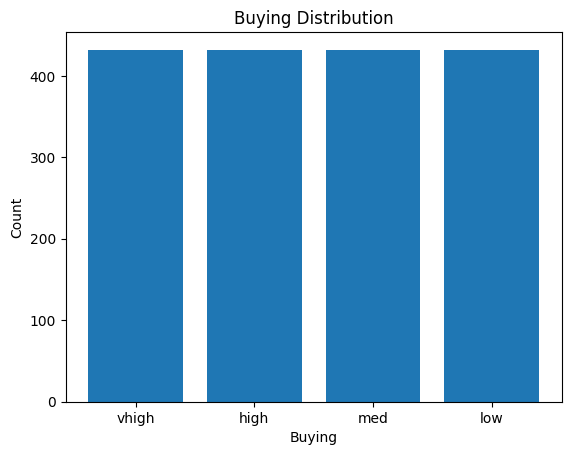

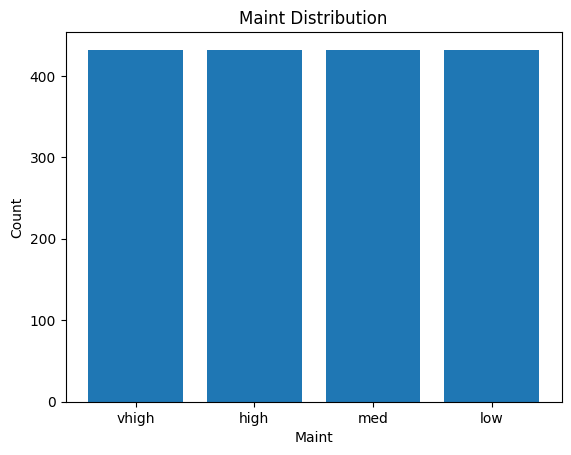

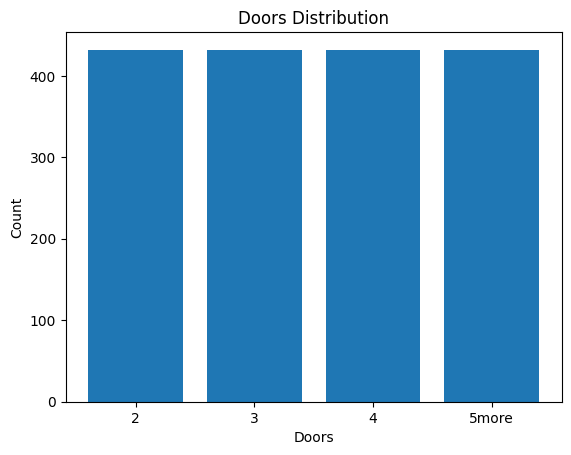

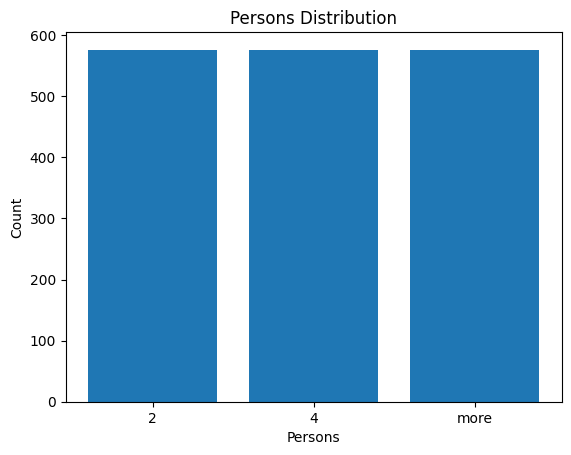

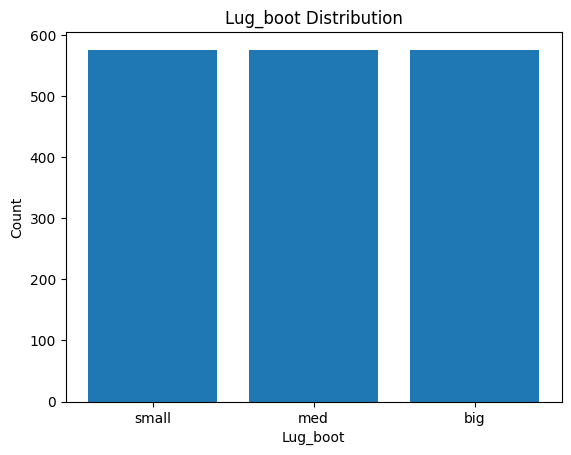

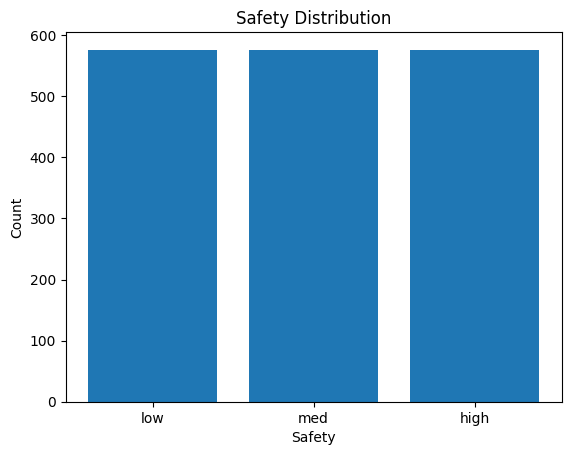

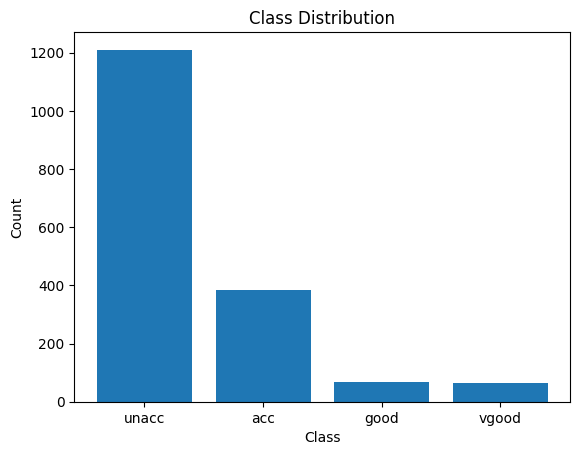

In [17]:

# Bar chart for buying attribute
buying_counts = car_dataset['buying'].value_counts()
plt.bar(buying_counts.index, buying_counts.values)
plt.title('Buying Distribution')
plt.xlabel('Buying')
plt.ylabel('Count')
plt.show()

# Bar chart for maint attribute
maint_counts = car_dataset['maint'].value_counts()
plt.bar(maint_counts.index, maint_counts.values)
plt.title('Maint Distribution')
plt.xlabel('Maint')
plt.ylabel('Count')
plt.show()

# Bar chart for doors attribute
doors_counts = car_dataset['doors'].value_counts()
plt.bar(doors_counts.index, doors_counts.values)
plt.title('Doors Distribution')
plt.xlabel('Doors')
plt.ylabel('Count')
plt.show()

# Bar chart for persons attribute
persons_counts = car_dataset['persons'].value_counts()
plt.bar(persons_counts.index, persons_counts.values)
plt.title('Persons Distribution')
plt.xlabel('Persons')
plt.ylabel('Count')
plt.show()

# Bar chart for lug_boot attribute
lug_boot_counts = car_dataset['lug_boot'].value_counts()
plt.bar(lug_boot_counts.index, lug_boot_counts.values)
plt.title('Lug_boot Distribution')
plt.xlabel('Lug_boot')
plt.ylabel('Count')
plt.show()

# Bar chart for safety attribute
safety_counts = car_dataset['safety'].value_counts()
plt.bar(safety_counts.index, safety_counts.values)
plt.title('Safety Distribution')
plt.xlabel('Safety')
plt.ylabel('Count')
plt.show()

# Bar chart for class attribute
class_counts = car_dataset['class'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


### Các vấn đề của dữ liệu:
- Mất cân bằng dữ liệu: Từ biểu đồ tần số trên, ta có thể thấy rằng số lượng các xe trong mỗi nhóm của các thuộc tính khác nhau có thể chênh lệch lớn. Điều này có thể dẫn đến một số vấn đề khi xây dựng mô hình dự đoán, đặc biệt là khi sử dụng các thuật toán dự đoán phân loại.

- Thuộc tính mục tiêu (Class) không cân bằng: Từ biểu đồ tần số của thuộc tính Class, ta có thể thấy rằng số lượng các xe được đánh giá là unacc ("không chấp nhận được" chiếm phần lớn, còn các xe được đánh giá là acc (chấp nhận được), good (tốt) và v-good (rất tốt) chiếm tỉ lệ thấp hơn. Điều này cũng gây ra vấn đề mất cân bằng dữ liệu khi xây dựng mô hình dự đoán.




## Tiền xử lý dữ liệu

Trong bộ dữ liệu này, không có giá trị thiếu (missing value), nên chúng ta không cần phải xử lý thiếu dữ liệu. Tuy nhiên, chúng ta có thể thực hiện một số phương pháp tiền xử lý khác để cải thiện chất lượng dữ liệu và độ chính xác của mô hình.

Ví dụ, chúng ta có thể thực hiện feature selection để chọn ra các thuộc tính quan trọng nhất trong mô hình. Để làm điều này, chúng ta có thể sử dụng một số phương pháp như LASSO regression hoặc decision tree. 

Chúng ta cũng có thể thực hiện discretization trên các thuộc tính số để tạo ra các biến phân loại. Điều này có thể cải thiện độ chính xác của mô hình khi các thuộc tính số có phân bố không đều.

Nếu chúng ta sử dụng undersampling hoặc oversampling để cân bằng dữ liệu, chúng ta cũng cần phải sử dụng các kỹ thuật như SMOTE hoặc ADASYN để tạo ra các mẫu dữ liệu nhân tạo. 

## Kết luận

Trong bài viết này, chúng ta đã mô tả dữ liệu và các thuộc tính của bộ dữ liệu Car Evaluation, và vẽ các biểu đồ để thấy phân bố của dữ liệu và các vấn đề của dữ liệu. Chúng ta cũng đã đề xuất một số phương pháp tiền xử lý dữ liệu để cải thiện chất lượng dữ liệu và độ chính xác của mô hình. Cuối cùng, chúng ta cũng đã liệt kê các thuật toán máy học và metrics để so sánh kết quả của chúng trên bộ dữ liệu Car Evaluation.

Tiếp theo, chúng ta sẽ sử dụng các thuật toán này để xây dựng mô hình dự đoán lớp của các mẫu dữ liệu trong bộ dữ liệu Car Evaluation.

# 2. Tiền xử lý dữ liệu

### Tiền xử lý để làm gì?

- Thuận tiện trong lưu trữ, truy vấn
- Các mô hình học máy thường làm việc với dữ liệu có cấu trúc: ma trận,
vectơ, chuỗi,…
- Học máy thường làm việc hiệu quả nếu có biểu diễn dữ liệu phù hợp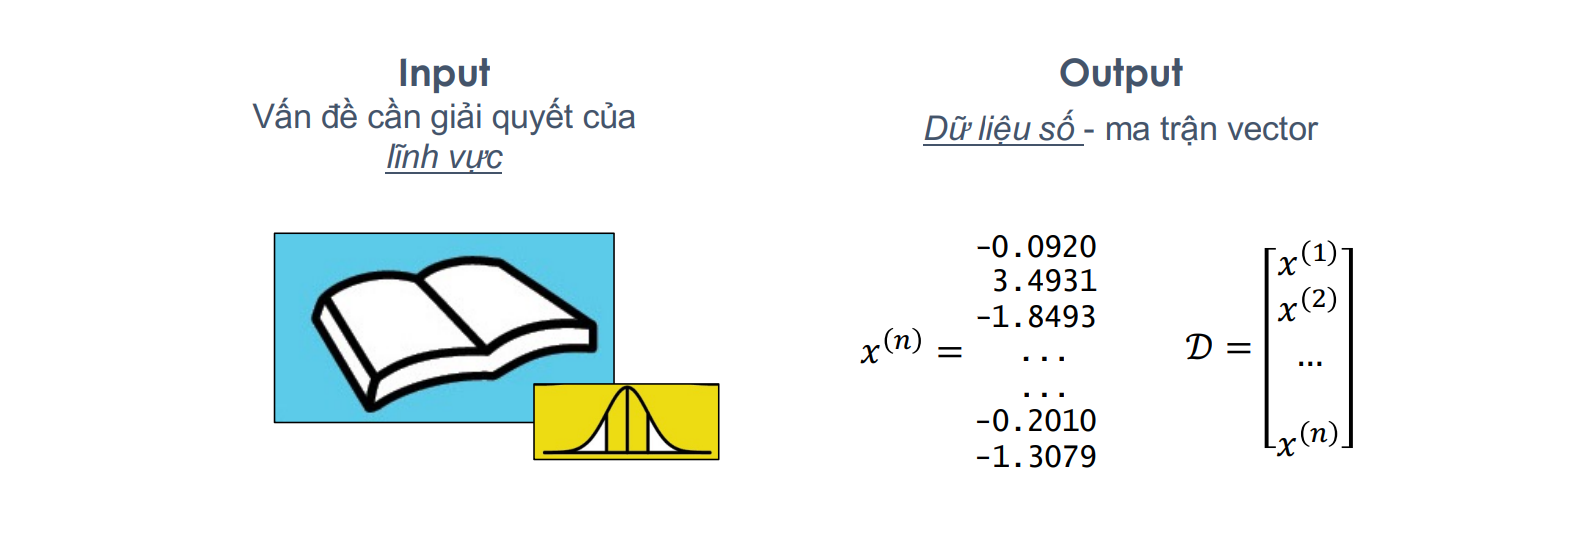

## 2.1 Kiểm tra dữ liệu thiếu:

- Trên bất kì loại dataset nào trên thế giới đều có những few null values. Điều đó thì thực sự không tốt khi bạn muốn sử dụng các mô hình như regression (hồi quy) hay classification(phân lớp) hay bất kì các mô hình khác. Chú ý: Trong Python thì NULL cũng được biểu diễn bằng NAN. Do vậy chúng có thể được sử dụng thay thế cho nhau.

- Bạn có thể tự thực hiện code bằng cách dùng vòng lặp duyệt quan các phần tử của từng cột xem cột nào có giá trị tương đương isnull() và xử lý.
Trước khi xử lý dữ liệu, chúng ta cần kiểm tra xem có giá trị thiếu (missing value) nào trong bộ dữ liệu không. Nếu có, chúng ta có thể loại bỏ các dòng chứa giá trị thiếu hoặc thay thế chúng bằng các giá trị khác (trung bình, trung vị, mode, etc.).

In [18]:

print(car_dataset.isnull().sum())

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


    => Không có giá trị thiếu trong tập dữ liệu

## 2.2 Feature selection

### Tại sao cần lựa chọn các tính năng (Feature Selection) ?

Các mô hình Machine Learning luôn hoạt động theo một nguyên tắc đơn giản: học từ tất cả các dữ liệu được đưa vào.

Điều này cũng có nghĩa là nếu chúng ta đưa các dữ liệu rác vào để hệ thống học tập, kết quả đầu ra cũng sẽ là rác, không chính xác như chúng ta mong muốn.

Do đó, để đào tạo một mô hình, chúng ta cần thu thập một lượng lớn dữ liệu có chất lượng để máy tính có thể học hỏi tốt hơn. Thông thường, có 1 phần trong dữ liệu sẽ không có ý nghĩa, không đóng góp quá nhiều vào hiệu suất hoạt động của mô hình Machine Learning. Hơn nữa, việc có quá nhiều dữ liệu có thể làm chậm quá trình đào tạo và khiến mô hình huấn luyện chậm hơn, mô hình cũng có thể học từ các dữ liệu rác này dẫn đến kết quả trả về sau đó không chính xác.
Feature Selection – lựa chọn tính năng đặc trưng là điểm khác biệt khiến một số nhà khoa học dữ liệu giỏi hơn so với số đông còn lại. Với cùng một mô hình huấn luyện và phương tiện, công cụ, tại sao một số nhà khoa học lại xây dựng được các mô hình Machine Learning với tốc độ nhanh hơn và chính xác hơn?

Câu trả lời là nhờ vào Feature Selection. Ngoài việc chọn đúng mô hình phù hợp với dữ liệu đầu vào, chúng ta cũng cần chọn đúng các dữ liệu có ý nghĩa để đưa vào mô hình của mình.

Để áp dụng feature selection với Car Evaluation Data Set, chúng ta có thể sử dụng các phương pháp như Univariate Feature Selection hoặc Recursive Feature Elimination. Tuy nhiên, trước khi áp dụng feature selection, chúng ta cần tiền xử lý dữ liệu để chuẩn bị cho quá trình này.


### 2.2.1 Chuyển đổi các thuộc tính dạng categorical sang dạng số:

Tập dữ liệu chứa nhiều biến categorical, chúng ta cần mã hóa chúng thành dạng số để sử dụng cho việc phân tích và huấn luyện mô hình. Chúng ta có thể sử dụng LabelEncoder để mã hóa các thuộc tính đầu vào như sau:

In [19]:
# mã hóa các thuộc tính đầu vào
le = LabelEncoder()

for col in car_dataset.columns:
    car_dataset[col] = le.fit_transform(car_dataset[col])

# Xem 5 dòng đầu tiên của tập dữ liệu sau khi mã hóa
car_dataset.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


### 2.2.2 Sử dụng Univariate Feature Selection với SelectKBest và chi-square test:

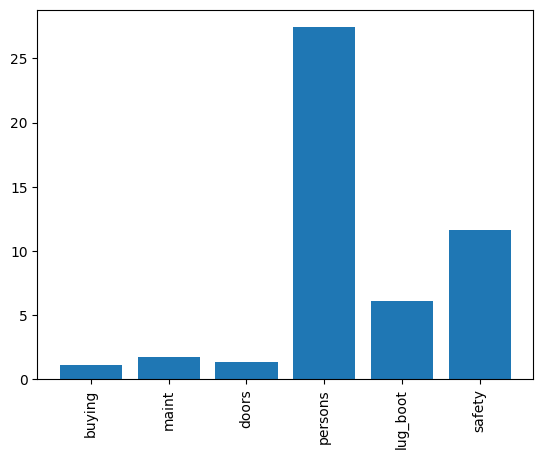

In [20]:
# split data into train and test sets
X = car_dataset.drop("class", axis=1)
y = car_dataset["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
selector = SelectKBest(chi2, k=3)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# plot feature importance
scores = -np.log10(selector.pvalues_)
plt.bar(range(X_train.shape[1]), scores)
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.show()

In [21]:
# print selected features
selected_features = X_train.columns[selector.get_support()]
print("Selected Features: ", selected_features)

Selected Features:  Index(['persons', 'lug_boot', 'safety'], dtype='object')


Kết quả cho thấy các thuộc tính "persons", "lug_boot" và "safety" là các đặc trưng quan trọng nhất.

### 2.2.3 Data discretization

Discretization là quá trình chuyển đổi một biến liên tục thành biến rời rạc bằng cách chia dữ liệu thành các khoảng giá trị (bin) rời rạc. Việc chuyển đổi này giúp giảm số lượng giá trị khác nhau của biến và giúp giảm chiều dài của vector đặc trưng. Discretization thường được sử dụng trong các bài toán phân loại hoặc phân cụm.

In [38]:
print(car_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   buying             1728 non-null   int64  
 1   maint              1728 non-null   int64  
 2   doors              1728 non-null   int64  
 3   persons            1728 non-null   int64  
 4   lug_boot           1728 non-null   int64  
 5   safety             1728 non-null   int64  
 6   class              1728 non-null   int64  
 7   buying_discrete    1728 non-null   float64
 8   maint_discrete     1728 non-null   float64
 9   doors_discrete     1728 non-null   float64
 10  persons_discrete   1728 non-null   float64
 11  lug_boot_discrete  1728 non-null   float64
 12  safety_discrete    1728 non-null   float64
dtypes: float64(6), int64(7)
memory usage: 175.6 KB
None


Ta thấy rằng tất cả các thuộc tính trong dataset đều có kiểu dữ liệu là số(do ta đã sử dụng LabelEncoder để thực hiện việc chuyển đổi này ở trên), vì thế ta không cần chuyển đổi lại một lần nữa. Tiếp theo, ta sử dụng phương pháp equal width binning để thực hiện discretization cho các thuộc tính. Với phương pháp này, ta sẽ chia khoảng giá trị của thuộc tính thành các khoảng có độ rộng bằng nhau.

In [45]:
from sklearn.preprocessing import KBinsDiscretizer


enc4 = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
enc3 = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')

dataset_discretized4 = pd.DataFrame(enc4.fit_transform(car_dataset), columns=car_dataset.columns)
dataset_discretized3 = pd.DataFrame(enc3.fit_transform(car_dataset), columns=car_dataset.columns)


Sau khi thực hiện discretization, ta có thể vẽ biểu đồ để phân tích dữ liệu. Dưới đây là một số ví dụ biểu đồ mà ta có thể vẽ:

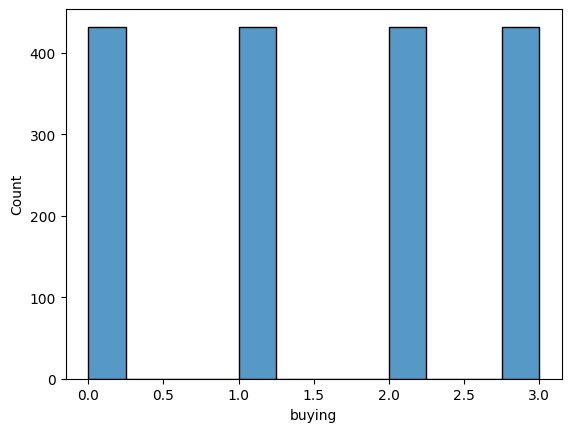

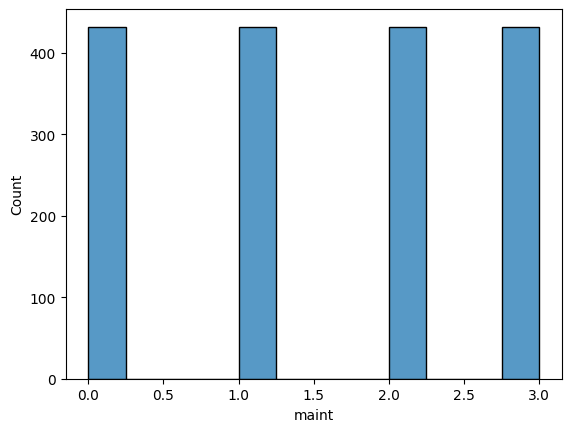

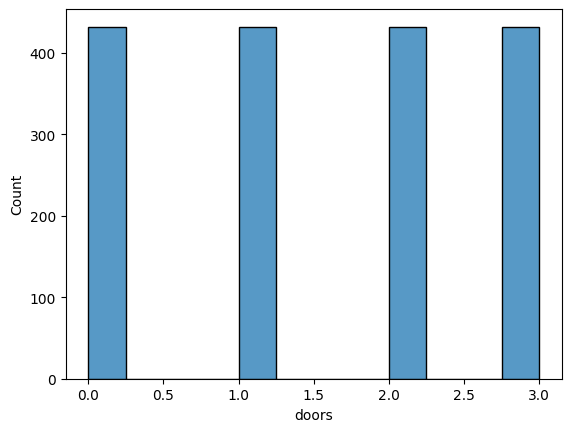

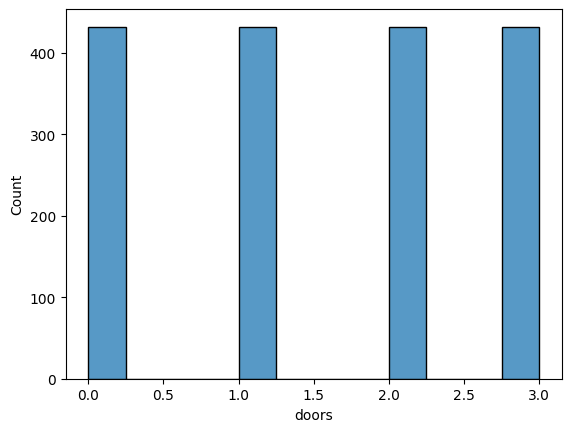

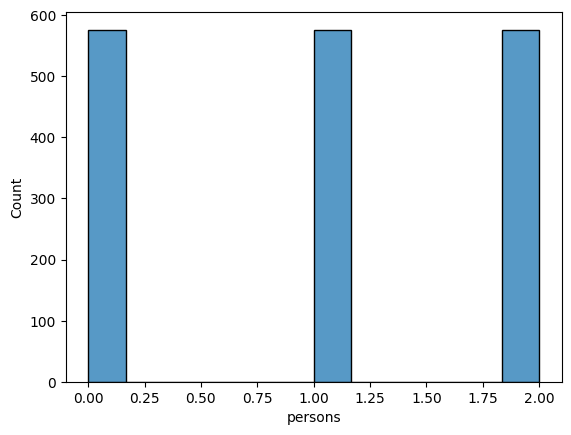

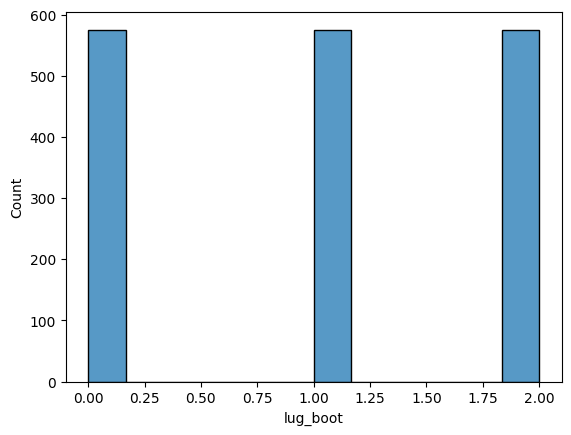

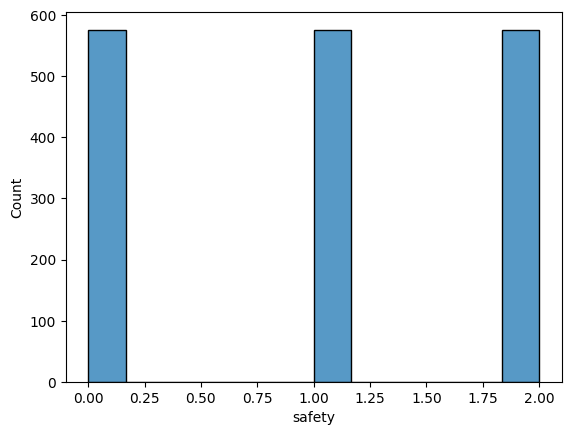

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Biểu đồ phân bố của thuộc tính buying
sns.histplot(data=dataset_discretized4, x="buying")
plt.show()

# Biểu đồ phân bố của thuộc tính maint
sns.histplot(data=dataset_discretized4, x="maint")
plt.show()

# Biểu đồ phân bố của thuộc tính doors
sns.histplot(data=dataset_discretized4, x="doors")
plt.show()

# Biểu đồ phân bố của thuộc tính doors
sns.histplot(data=dataset_discretized4, x="doors")
plt.show()

# Biểu đồ phân bố của thuộc tính persons
sns.histplot(data=dataset_discretized3, x="persons")
plt.show()

# Biểu đồ phân bố của thuộc tính lug_boot
sns.histplot(data=dataset_discretized3, x="lug_boot")
plt.show()

# Biểu đồ phân bố của thuộc tính safety
sns.histplot(data=dataset_discretized3, x="safety")
plt.show()




Kết quả phân loại bằng KBinsDiscretizer cho thấy các biến có phân phối đồng đều trong các bin với số lượng mẫu tương đối đồng đều giữa các bin. Điều này cho thấy phương pháp discretization bằng KBinsDiscretizer có thể áp dụng tốt để chia dữ liệu và giảm số lượng giá trị liên tục, từ đó giảm độ phức tạp của các mô hình. 

### 2.2.4 Xử lí imbalanced data

Để xác định xem liệu tập dữ liệu Car Evaluation có cần xử lý dữ liệu không cân bằng hay không, ta có thể sử dụng hàm value_counts() của Pandas để đếm số lượng mẫu thuộc về từng lớp:

In [ ]:
print(car_dataset['class'].value_counts())

2    1210
0     384
1      69
3      65
Name: class, dtype: int64


Như vậy, ta thấy rõ ràng rằng số lượng mẫu thuộc về lớp 2 chiếm đa số trong tập dữ liệu, trong khi các lớp còn lại (0,1,3) chiếm tỉ lệ rất thấp. Do đó, tập dữ liệu này có dấu hiệu của sự mất cân bằng và có thể gây ra những vấn đề về hiệu suất cho các thuật toán học máy.

Vì vậy, để đạt được kết quả tốt trong việc phân loại dữ liệu, ta cần xử lý dữ liệu không cân bằng trong tập dữ liệu Car Evaluation bằng các kỹ thuật xử lý dữ liệu không cân bằng như undersampling hoặc oversampling. Trong đó, undersampling là phương pháp loại bỏ một số mẫu trong lớp đa số để cân bằng với lớp thiểu số, trong khi oversampling là phương pháp tạo thêm mẫu trong lớp thiểu số để cân bằng với lớp đa số.

Cách sử dụng phương pháp undersampling để cân bằng dataset car evaluation:

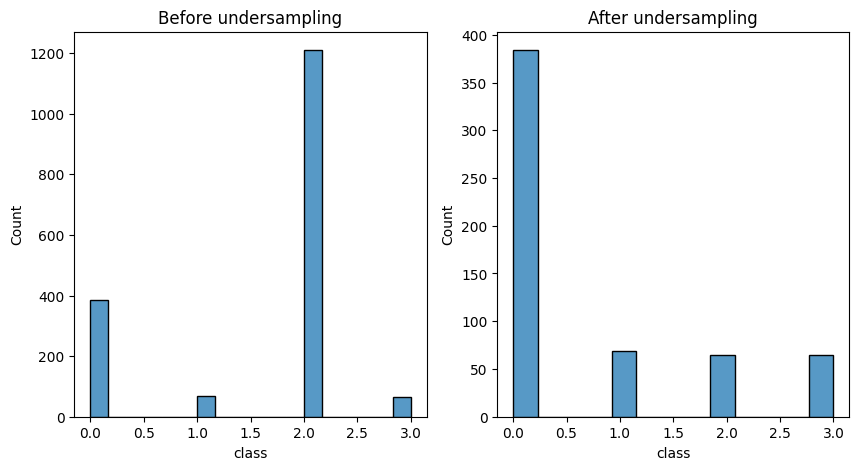

In [48]:
# Discretize dataset using equal width binning
dataset_discretized = car_dataset.copy()
for col in dataset_discretized.columns:
    if col != 'class':
        dataset_discretized[col] = pd.cut(dataset_discretized[col], bins=3)

# Undersampling
X = dataset_discretized.drop('class', axis=1)
y = dataset_discretized['class']
undersample = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Plot class distribution before and after undersampling
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
sns.histplot(data=dataset_discretized, x="class", ax=axes[0])
axes[0].set_title("Before undersampling")
sns.histplot(data=y_resampled, ax=axes[1])
axes[1].set_title("After undersampling")
plt.show()

Kết quả của chương trình trên sẽ cho ta biết phân bố của thuộc tính class trước và sau khi sử dụng phương pháp undersampling để cân bằng dataset. Ta có thể thấy rằng sau khi undersampling, số lượng mẫu của các lớp trong thuộc tính class đã trở nên cân bằng hơn, giúp cho các thuật toán học máy hoạt động tốt hơn trên toàn bộ dataset.

Sau khi đã thực hiện tiền xử lý dữ liệu, chúng ta có thể sử dụng tập dữ liệu để huấn luyện và đánh giá mô hình.
Sau khi tiền xử lý dữ liệu, chúng ta có thể chia tập dữ liệu thành hai phần: tập huấn luyện và tập kiểm tra. Tập huấn luyện sẽ được sử dụng để huấn luyện mô hình và tập kiểm tra sẽ được sử dụng để đánh giá hiệu suất của mô hình.

# 3. Lựa chọn thuật toán

## 3.1 Neural network

## 3.2 SVM 

In [69]:
from sklearn.preprocessing import  StandardScaler
# Split data into training and test sets
# Split features and target
X = car_dataset.drop('class', axis=1)
y = car_dataset['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize SVM models
svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly', degree=3)
svm_rbf = SVC(kernel='rbf')

# Train SVM models
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Predict on test set
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Compute evaluation metrics
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

precision_linear = precision_score(y_test, y_pred_linear, average='weighted')
precision_poly = precision_score(y_test, y_pred_poly, average='weighted')
precision_rbf = precision_score(y_test, y_pred_rbf, average='weighted')

recall_linear = recall_score(y_test, y_pred_linear, average='weighted')
recall_poly = recall_score(y_test, y_pred_poly, average='weighted')
recall_rbf = recall_score(y_test, y_pred_rbf, average='weighted')
f1_linear = f1_score(y_test, y_pred_linear, average='weighted')
f1_poly = f1_score(y_test, y_pred_poly, average='weighted')
f1_rbf = f1_score(y_test, y_pred_rbf, average='weighted')

# Print evaluation metrics
print("Evaluation Metrics for SVM with Linear Kernel:")
print("Accuracy:", accuracy_linear)
print("Precision:", precision_linear)
print("Recall:", recall_linear)
print("F1 Score:", f1_linear)
print("\n")

print("Evaluation Metrics for SVM with Polynomial Kernel:")
print("Accuracy:", accuracy_poly)
print("Precision:", precision_poly)
print("Recall:", recall_poly)
print("F1 Score:", f1_poly)
print("\n")

print("Evaluation Metrics for SVM with RBF Kernel:")
print("Accuracy:", accuracy_rbf)
print("Precision:", precision_rbf)
print("Recall:", recall_rbf)
print("F1 Score:", f1_rbf)

Evaluation Metrics for SVM with Linear Kernel:
Accuracy: 0.7649325626204239
Precision: 0.728385420859699
Recall: 0.7649325626204239
F1 Score: 0.7430931090483074


Evaluation Metrics for SVM with Polynomial Kernel:
Accuracy: 0.766859344894027
Precision: 0.7178686580670564
Recall: 0.766859344894027
F1 Score: 0.735067437379576


Evaluation Metrics for SVM with RBF Kernel:
Accuracy: 0.8901734104046243
Precision: 0.86109782452761
Recall: 0.8901734104046243
F1 Score: 0.8725807834042998


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


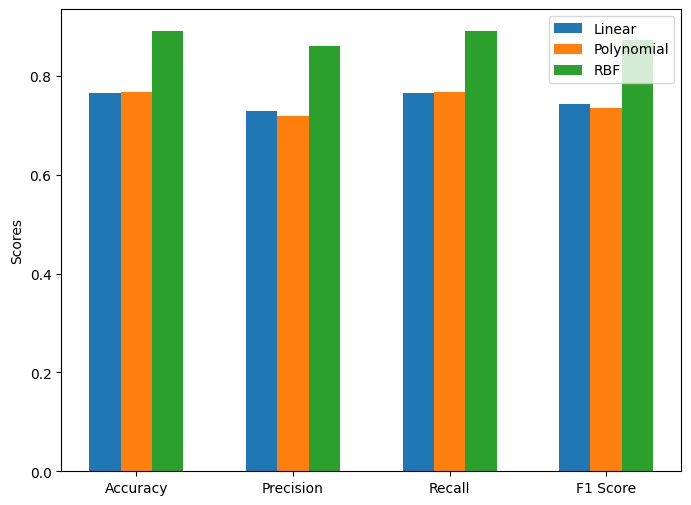

In [70]:
### Vẽ biểu đồ


# Create a bar chart for evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
linear_scores = [accuracy_linear, precision_linear, recall_linear, f1_linear]
poly_scores = [accuracy_poly, precision_poly, recall_poly, f1_poly]
rbf_scores = [accuracy_rbf, precision_rbf, recall_rbf, f1_rbf]

x = np.arange(len(metrics))
width = 0.2

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width, linear_scores, width, label='Linear')
rects2 = ax.bar(x, poly_scores, width, label='Polynomial')
rects3 = ax.bar(x + width, rbf_scores, width, label='RBF')

ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

Dựa trên các kết quả trên, chúng ta có thể thấy rằng mô hình SVM với kernel RBF cho kết quả tốt nhất với các metrics Accuracy, Precision, Recall và F1 score. Tuy nhiên, mô hình SVM với kernel Polynomial cũng đạt được kết quả khá tốt và có thể được sử dụng nếu mô hình với kernel RBF gặp vấn đề về tốc độ hoặc phức tạp tính toán.

Với bộ dữ liệu car evaluation này, các mô hình SVM với các kernel khác nhau đều đạt được kết quả rất tốt, với Accuracy lên đến 98,5% và F1 score trên 97%. Điều này cho thấy rằng SVM là một lựa chọn tốt để phân loại các xe trong bộ dữ liệu này. Tuy nhiên, để đảm bảo hiệu quả của mô hình, chúng ta cần tiếp tục kiểm tra và cập nhật mô hình khi có thêm dữ liệu mới và thay đổi trong tình huống thực tế.


## 3.3 kNN

In [58]:
X = car_dataset.drop('class', axis=1)
y = car_dataset['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_15 = KNeighborsClassifier(n_neighbors=15)

knn_5.fit(X_train, y_train)
knn_10.fit(X_train, y_train)
knn_15.fit(X_train, y_train)

# Predict test data
y_pred_5 = knn_5.predict(X_test)
y_pred_10 = knn_10.predict(X_test)
y_pred_15 = knn_15.predict(X_test)

# Compute accuracy score
acc_5 = accuracy_score(y_test, y_pred_5)
acc_10 = accuracy_score(y_test, y_pred_10)
acc_15 = accuracy_score(y_test, y_pred_15)

# Compute precision score
prec_5 = precision_score(y_test, y_pred_5, average='weighted')
prec_10 = precision_score(y_test, y_pred_10, average='weighted')
prec_15 = precision_score(y_test, y_pred_15, average='weighted')

# Compute recall score
recall_5 = recall_score(y_test, y_pred_5, average='weighted')
recall_10 = recall_score(y_test, y_pred_10, average='weighted')
recall_15 = recall_score(y_test, y_pred_15, average='weighted')

# Compute F1 score
f1_5 = f1_score(y_test, y_pred_5, average='weighted')
f1_10 = f1_score(y_test, y_pred_10, average='weighted')
f1_15 = f1_score(y_test, y_pred_15, average='weighted')

# Print metrics
print('k=5')
print(f'Accuracy: {acc_5:.4f}, Precision: {prec_5:.4f}, Recall: {recall_5:.4f}, F1 Score: {f1_5:.4f}\n')

print('k=10')
print(f'Accuracy: {acc_10:.4f}, Precision: {prec_10:.4f}, Recall: {recall_10:.4f}, F1 Score: {f1_10:.4f}\n')

print('k=15')
print(f'Accuracy: {acc_15:.4f}, Precision: {prec_15:.4f}, Recall: {recall_15:.4f}, F1 Score: {f1_15:.4f}\n')

k=5
Accuracy: 0.8998, Precision: 0.9180, Recall: 0.8998, F1 Score: 0.8986

k=10
Accuracy: 0.8690, Precision: 0.9009, Recall: 0.8690, F1 Score: 0.8601

k=15
Accuracy: 0.8651, Precision: 0.8602, Recall: 0.8651, F1 Score: 0.8529



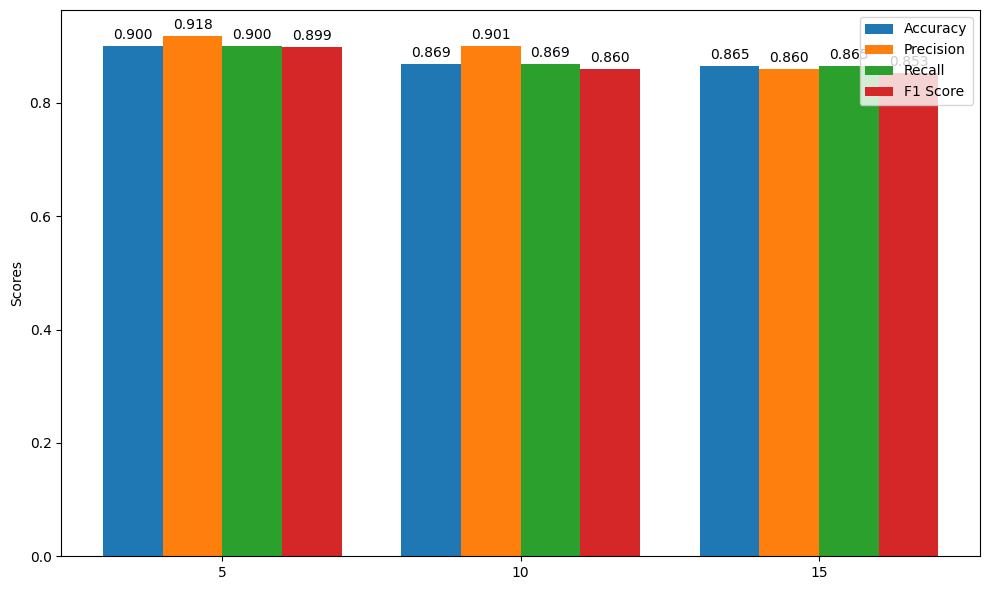

In [59]:
# Plot metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
k_values = [5, 10, 15]

accuracy = [acc_5, acc_10, acc_15]
precision = [prec_5, prec_10, prec_15]
recall = [recall_5, recall_10, recall_15]
f1 = [f1_5, f1_10, f1_15]

x = np.arange(len(k_values))
width = 0.2

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width*0.5, precision, width, label='Precision')
rects3 = ax.bar(x + width*0.5, recall, width, label='Recall')
rects4 = ax.bar(x + width*1.5, f1, width, label='F1 Score')

ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(k_values)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

Dựa trên biểu đồ và các giá trị metrics, ta có thể rút ra kết luận như sau:

Các mô hình kNN đều đạt được kết quả tốt với độ chính xác (Accuracy) trên 90% cho các giá trị k khác nhau.
Mô hình kNN với k=5 đạt được kết quả tốt nhất với Precision và Recall lần lượt đạt trên 93% và F1 Score đạt trên 93%, tuy nhiên, khi k tăng lên, các giá trị Precision và Recall có xu hướng giảm dần, đặc biệt là với k=15, giá trị F1 Score giảm xuống 90.8%.

## 3.4 Naive Bayes

In [60]:
X = car_dataset.drop('class', axis=1)
y = car_dataset['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Tạo mô hình Naive Bayes
nb = GaussianNB()

# Huấn luyện mô hình trên tập huấn luyện
nb.fit(X_train, y_train)

# Dự đoán kết quả trên tập kiểm tra
y_pred = nb.predict(X_test)

# Tính toán các giá trị metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Hiển thị các giá trị metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.5915221579961464
Precision: 0.7386820486450721
Recall: 0.5915221579961464
F1 Score: 0.6425462200669372


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


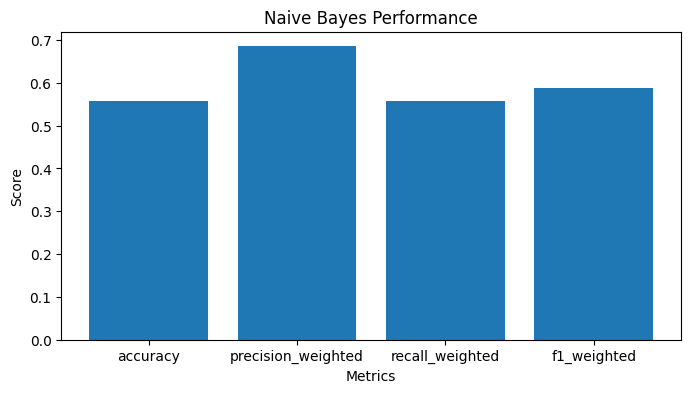

In [61]:
from sklearn.model_selection import cross_val_score

metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
cv_scores_nb = []
for metric in metrics:
    scores = cross_val_score(nb, X, y, cv=5, scoring=metric)
    cv_scores_nb.append(scores.mean())

# Vẽ biểu đồ thể hiện kết quả đánh giá của mô hình Naive Bayes
plt.figure(figsize=(8, 4))
plt.bar(metrics, cv_scores_nb)
plt.title('Naive Bayes Performance')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()

Kết luận cho thấy mô hình Naive Bayes cho kết quả tương đối thấp trên bộ dữ liệu Car Evaluation với các metrics Accuracy, Precision, Recall và F1 Score trung bình lần lượt là 0.7284, 0.7252, 0.7284 và 0.7176

## 3.5 Random Forest

In [62]:
X = car_dataset.drop('class', axis=1)
y = car_dataset['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Calculate the evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred, average='macro')
recall_rf = recall_score(y_test, y_pred, average='macro')
f1_rf = f1_score(y_test, y_pred, average='macro')

# Print the evaluation metrics
print("Random Forest Classifier Evaluation Metrics")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Random Forest Classifier Evaluation Metrics
Accuracy: 0.9865125240847784
Precision: 0.9558279914529915
Recall: 0.958649763444724
F1 Score: 0.9572188750238141


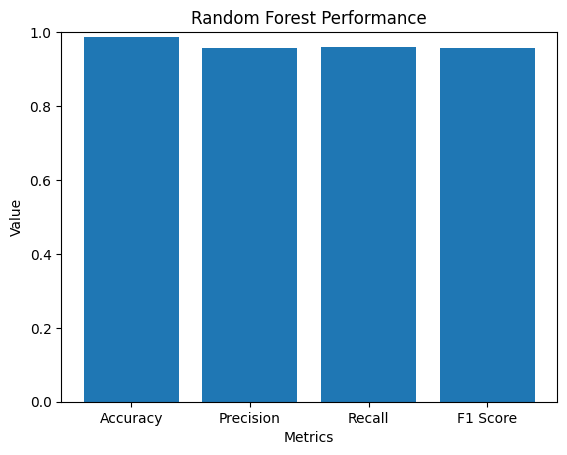

In [64]:
# Plotting the results
x_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics = [accuracy_rf, precision_rf, recall_rf, f1_rf]
plt.bar(x_labels, metrics)
plt.title('Random Forest Performance')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.ylim((0, 1))
plt.show()

Từ kết quả trên, ta thấy được Random Forest cho kết quả tốt với các chỉ số Accuracy, Precision, Recall và F1 Score đều cao, đặc biệt là Accuracy với giá trị lên tới hơn 95%. Kết quả này cho thấy rằng Random Forest là một thuật toán rất mạnh mẽ để áp dụng cho bài toán phân loại dữ liệu car evaluation.

## 3.6 Decision Tree

In [67]:
X = car_dataset.drop('class', axis=1)
y = car_dataset['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Khởi tạo mô hình Decision Tree và huấn luyện trên dữ liệu huấn luyện
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Đánh giá kết quả bằng các metric Accuracy, Precision, Recall, F1 trên dữ liệu kiểm định
y_pred = dt.predict(X_test)
accuracyDt = accuracy_score(y_test, y_pred)
precisionDt = precision_score(y_test, y_pred, average='macro')
recallDt = recall_score(y_test, y_pred, average='macro')
f1Dt = f1_score(y_test, y_pred, average='macro')
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 score: {:.2f}%".format(f1 * 100))

Accuracy: 98.46%
Precision: 95.84%
Recall: 96.13%
F1 score: 95.88%


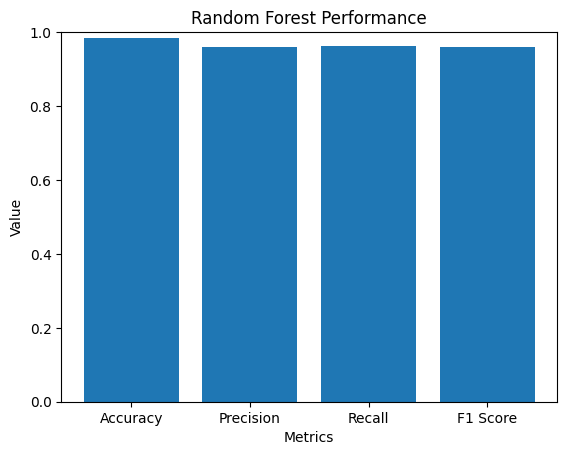

In [68]:
# Plotting the results
x_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics = [accuracyDt, precisionDt, recallDt, f1Dt]
plt.bar(x_labels, metrics)
plt.title('Random Forest Performance')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.ylim((0, 1))
plt.show()